# CART and Random Forest

In this notebook, we propose to illustrate Chapter 2 on Decision Trees with scikit-learn packages.

We first load standard python module, datasets, supervised techniques and the dedicated modules tree (decision trees) and RF.

In [75]:
import matplotlib.pyplot as plt
import numpy as np 
import re#python regex

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn import tree

#dir(tree)

# Toy example: Iris dataset

We start with a toy example based on the popular iris dataset. We build a decision tree on the 4-dimensional Iris dataset, after a t-SNE reduction.

In [10]:
#t-SNE
from sklearn.manifold import TSNE

In [1]:
#load iris dataset and perform t-SNE dimensionality reduction technique

In [2]:
#scatterplot iris dataset with 2 t-SNE axis
#add nice 3 colors (classes) and test alpha parameter in the scatterplot

In [3]:
#fir a decision tree on the full iris dataset


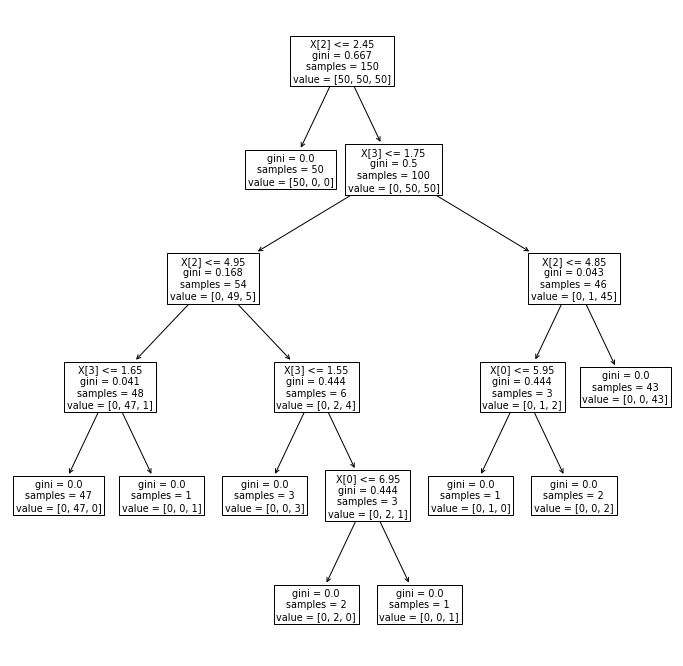

In [14]:
#nice plot of your tree 
plt.figure(figsize=(12,12))
tree.plot_tree(clf)
plt.show()

## Other tree representations

In [40]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



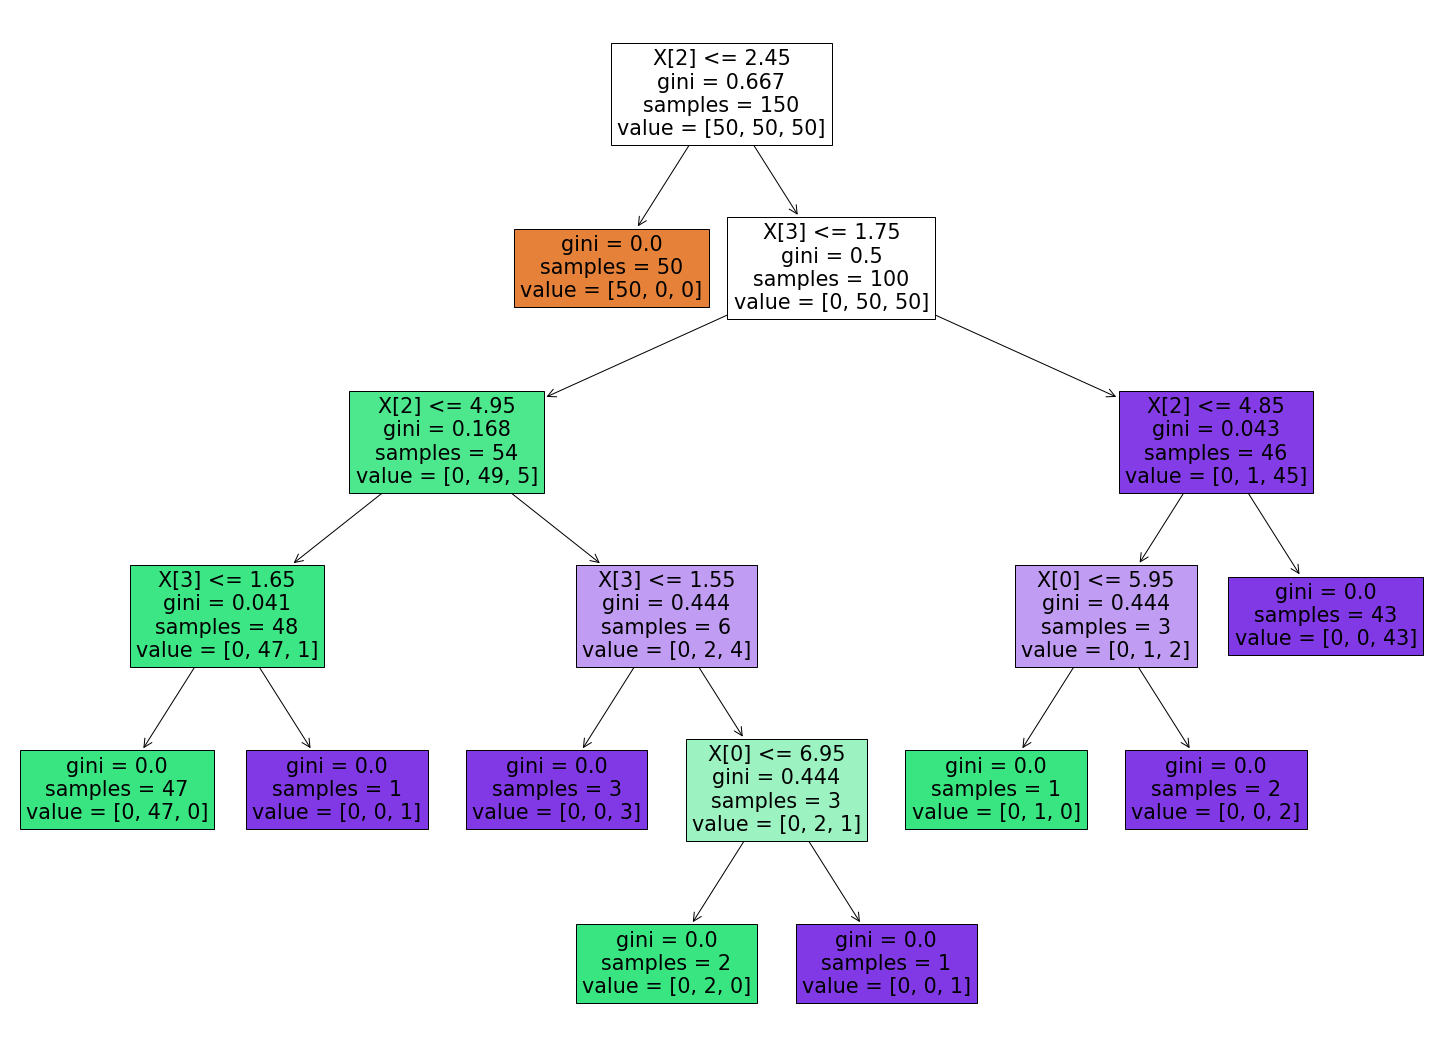

In [43]:
fig = plt.figure(figsize=(6.4*4,4.8*4))
_ = tree.plot_tree(clf,  
                   filled=True)
#plt.savefig("output.png",dpi=300)
# DPI is the measure of the number of dots that can be placed in a line across one inch, or 2.54 centimeters.


# Spam dataset preparation

We study the following Spam dataset, based on 4601 emails (1813 Spam = 39.4%). The number of Attributes is 58 (57 continuous, 1 nominal class label). 

In [7]:
import csv, requests
import random

with requests.Session() as s:
    download = s.get('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    data = list(cr)

In [8]:
#download spambase.names to get the colnames
with open('spambase.names') as f:
    lines = f.readlines()

In [10]:
colnames = lines[-57:]
colnames = [re.search(r'\w*',elt).group() for elt in colnames]
colnames.append('spam')


In [4]:
#make a nice plot with t-SNE to look at the two classes


# Decision Tree on Spam dataset

In [19]:
#split dataset into train and test set

import random
import pandas as pd


In [26]:
#fit a decision tree on the train set
#help(tree.DecisionTreeClassifier)
#dir(tree.DecisionTreeClassifier)

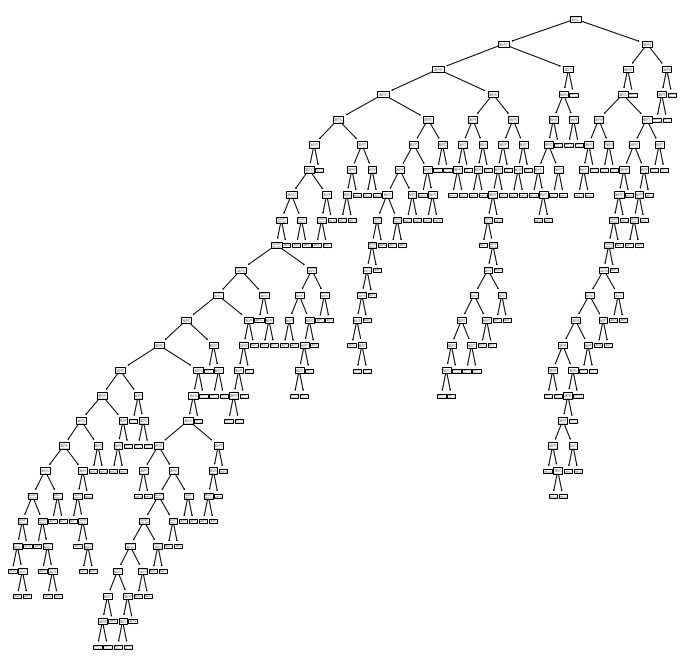

In [29]:
#plot your tree


In [30]:
#use your test data to measure performances with a simple accuracy, or compute the False positive rate and false negative rate 

In [34]:
#restart the study with another train test split


# Easier code and cross-validation

Sklearn provides many self-contained function to make the data miner life easy with standard experiments: train and test split, cross-validation, etc.
WARNING : these 'functions' make several things in one line of code. This is DANGEROUS.

In [5]:
from sklearn.model_selection import cross_val_score, train_test_split

In [11]:
data_train, data_test = train_test_split(data,train_size=3/4,stratify=data.iloc[:,-1])


In [46]:
cross_val_score(clf,np.array(data.iloc[:,:-1]), data.iloc[:,-1],cv=10)

array([0.92190889, 0.9132321 , 0.91106291, 0.91304348, 0.9326087 ,
       0.91304348, 0.91956522, 0.91304348, 0.93899782, 0.92810458])

# Pruning CART

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. 

Here we study Cost complexity pruning introduced in Chapter 2 to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.

In [47]:
import sklearn
sklearn. __version__ 

'0.21.3'

In [48]:
data_train, data_test = train_test_split(data,train_size=1/4,stratify=data.iloc[:,-1])

X_train, y_train = data_train.iloc[:,:-1], data_train.iloc[:,-1]
X_test, y_test = data_test.iloc[:,:-1], data_test.iloc[:,-1]

In [78]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Plots illustrating overfitting

In [ ]:
#niceplot with drawstyle="steps-post"
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Bonus: 
- Make the same study with min_samples_leaf and max_depth parameters
- Plot the train test evolution and the resulting tree

# Bagging

In this section, we propose to implement manual bagging (boostrap aggregating) a set of 10 decision trees.


## Bootstrap

Start by manually build 10 samples and fit 10 decision trees as before.

In [80]:
#do manual bagging
from random import choices
from datetime import datetime

B = 10
L = int(len(data)/2)
samples = []
decisions_trees = []

for m in range(B):
    print('---build tree',m,'over',B,end=" ")

    
    
    
    print('done in',time_spent.microseconds,'microseconds')


---build tree 0 over 10 done in 129066 microseconds
---build tree 1 over 10 done in 56916 microseconds
---build tree 2 over 10 done in 61481 microseconds
---build tree 3 over 10 done in 71460 microseconds
---build tree 4 over 10 done in 58690 microseconds
---build tree 5 over 10 done in 60311 microseconds
---build tree 6 over 10 done in 61537 microseconds
---build tree 7 over 10 done in 64996 microseconds
---build tree 8 over 10 done in 55239 microseconds
---build tree 9 over 10 done in 53301 microseconds


## Aggregation with majority vote

We then aggregate the prediction of these trees by computing the majority vote over a new observation

In [81]:
#build a list of predictions for a new observations

(1, 58)


In [12]:
from collections import Counter

The Counter class is a subclass of dict to count hashable python objects. It is a collection where each element are keys with number of occurences as values. This class Counter is similar to bag or multiset in other langages.

## Exercice

Code two functions to create a simple random Forest:
- boostrap function that returns a list of fitted decision trees.
- aggregate function that returns a prediction based on the aggregation of the bootstrap output.
- Return the OOB error for each boostrapped sample and compare this estimated generalization performances with a majority vote based on the 10 decision trees.


Note: of course there exists a bagging classifier in sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

# Boosting

Use sklearn to compute Adaboost classifier based on decision trees.

In [82]:
from sklearn.ensemble import AdaBoostClassifier


In [73]:

print('The train accuracy is: ',train_accuracy*100,'%')

print('The test accuracy is: ',test_accuracy*100,'%')

print('The fit was made in',end-start)

The train accuracy is:  97.47826086956522 %
The test accuracy is:  93.56708200521588 %
The fit was made in 0:00:05.677136


# Random Forests

Make the same study with Random Forest classifier.


In [74]:
from sklearn.ensemble import RandomForestClassifier

## BONUS 

Try to improve the previous results by aggregating many other classifiers.

Look here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# WARNING: Categorical data and One Hot encoding

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

data = pd.DataFrame()
data['A'] = ['a','b','a','a']
data['B'] = [2,4,2,6]
#data['C'] = [0, 0, 1, 0]
data['Class'] = [10,20,12,14]

tree = DecisionTreeRegressor()

one_hot_data = pd.get_dummies(data[['A','B']],drop_first=True)
tree.fit(one_hot_data, data['Class'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Explanation: One of the main benefit of CART is the ability to deal with raw categorical discrete or continuous data. Unfortunately, the basic sklearn sklearn decision trees do not handle categorical data - see issue [#5442](https://github.com/scikit-learn/scikit-learn/issues/5442).

The recommended approach of using Label Encoding converts to integers which the DecisionTreeClassifier() will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense.

Using below a OneHotEncoder is the only current valid way, allowing arbitrary splits not dependent on the label ordering, but is computationally expensive.

In [34]:
one_hot_data

,B,A_b
0,2,0
1,4,1
2,2,0
3,6,0
